Para comenzar importamos librerias que servirán para la manipulación/exploración/preprocesamiento de los datos, evaluación e implementación del modelo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

warnings.filterwarnings('ignore')
%matplotlib inline

**Preprocesamiento**

In [2]:
#Load the dataset and show the
df = pd.read_csv(r'/content/up_all_features_kmer_freq_map.csv')
# Establecer la primera columna como índice
df.set_index('nameseq', inplace=True)
df.T

nameseq,TRINITY_DN10013_c0_g1_i16.p1,TRINITY_DN1003_c1_g1_i5.p1,TRINITY_DN10080_c0_g1_i29.p1,TRINITY_DN10139_c0_g1_i2.p1,TRINITY_DN10150_c1_g1_i22.p1,TRINITY_DN10181_c0_g1_i2.p1,TRINITY_DN10189_c0_g1_i2.p1,TRINITY_DN10207_c1_g1_i21.p1,TRINITY_DN10213_c0_g1_i1.p1,TRINITY_DN10223_c1_g1_i20.p1,...,TRINITY_DN9744_c0_g1_i9.p1,TRINITY_DN97577_c0_g3_i1.p1,TRINITY_DN975_c1_g3_i1.p2,TRINITY_DN9772_c1_g1_i2.p1,TRINITY_DN9831_c0_g1_i1.p1,TRINITY_DN9848_c6_g1_i2.p1,TRINITY_DN9856_c0_g1_i51.p1,TRINITY_DN9856_c0_g1_i88.p1,TRINITY_DN9905_c0_g1_i4.p1,TRINITY_DN9_c4_g1_i3.p1
average,0.001848,2.687567e-03,4.100501e-03,0.004837,0.003460,7.412272e-03,0.005421,0.003309,1.218156e-03,0.001535,...,0.007561,3.525076e-03,0.008179,2.890988e-03,0.005478,2.682277e-03,2.290961e-03,2.290961e-03,0.003858,0.009701
median,0.000236,1.007845e-04,3.279483e-04,0.000152,0.000276,1.508061e-04,0.000114,0.000305,1.634142e-04,0.000132,...,0.000260,3.376661e-04,0.000122,1.972945e-04,0.000207,1.070229e-04,1.684127e-04,1.684127e-04,0.000268,0.001674
maximum,1.672589,1.138732e+00,1.353938e+00,1.103383,1.378962,1.055545e+00,1.060593,1.344044,2.748340e+00,1.451536,...,1.107309,1.435952e+00,1.031494,1.329966e+00,1.149339,1.146605e+00,1.366992e+00,1.366992e+00,1.471279,1.781159
minimum,0.000002,3.846866e-07,1.581708e-07,0.000003,0.000004,6.432100e-07,0.000002,0.000003,4.604988e-08,0.000000,...,0.000005,4.327940e-07,0.000000,9.987049e-07,0.000001,2.662736e-07,2.858468e-07,2.858468e-07,0.000002,0.000007
peak,204190.873874,5.544049e+04,3.080925e+04,16400.574209,44217.000000,6.565688e+03,12360.123288,48043.972112,7.828771e+05,235358.592757,...,6744.966102,4.482173e+04,5216.796020,5.868813e+04,13507.466667,5.617117e+04,9.632056e+04,9.632056e+04,37324.800000,9036.983110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
maxdegreetwo.3-mer,12.000000,4.000000e+00,4.000000e+00,4.000000,6.000000,4.000000e+00,4.000000,8.000000,1.000000e+01,8.000000,...,4.000000,6.000000e+00,4.000000,6.000000e+00,4.000000,4.000000e+00,6.000000e+00,6.000000e+00,6.000000,10.000000
neighborhood_size.3-mer,3.231388,3.060185e+00,3.125356e+00,3.043103,3.141509,3.013889e+00,3.020202,3.116592,3.635549e+00,3.191641,...,3.040268,3.157044e+00,3.000000,3.135881e+00,3.046729,3.064220e+00,3.168040e+00,3.168040e+00,3.175258,3.169492
radius.3-mer,23.000000,3.900000e+01,3.100000e+01,42.000000,38.000000,5.100000e+01,38.000000,49.000000,1.300000e+01,25.000000,...,36.000000,2.300000e+01,48.000000,2.400000e+01,28.000000,4.000000e+01,2.500000e+01,2.500000e+01,22.000000,37.000000
avg_weighted_degree.3-mer,2.275654,2.064815e+00,2.153846e+00,2.043103,2.160377,2.013889e+00,2.020202,2.134529,2.696841e+00,2.207951,...,2.040268,2.184758e+00,2.000000,2.157113e+00,2.065421,2.068807e+00,2.177924e+00,2.177924e+00,2.221649,2.220339


In [3]:
#Data type in columns
print(df.dtypes.to_string())

average                                   float64
median                                    float64
maximum                                   float64
minimum                                   float64
peak                                      float64
none_levated_peak                         float64
sample_standard_deviation                 float64
population_standard_deviation             float64
percentile15                              float64
percentile25                              float64
percentile50                              float64
percentile75                              float64
amplitude                                 float64
variance                                  float64
interquartile_range                       float64
semi_interquartile_range                  float64
coefficient_of_variation                  float64
skewness                                  float64
kurtosis                                  float64
k1                                        float64


In [4]:
# count the number of "0" values in each column
zero_counts = df.eq(0).sum()

# set a threshold value for the number of zeros
threshold = 580


# filter the columns based on the threshold
high_zero_columns = zero_counts[zero_counts >= threshold]

# print the filtered columns along with their corresponding count of zeros
print(high_zero_columns)


transitivity_avglocal_undirected.3-mer    814
transitivity_undirected.3-mer             814
dtype: int64


In [5]:
# count the number of null or NA values in each column
na_counts = df.isna().sum()

# set a threshold value for the number of null or NA values
threshold = 1

# filter the columns based on the threshold
high_na_columns = na_counts[na_counts >= threshold]

# print the filtered columns along with their corresponding count of null or NA values
print(high_na_columns)


kurtosis    2
dtype: int64


In [6]:
new_df = df.drop(['transitivity_avglocal_undirected.3-mer', 'transitivity_undirected.3-mer' ], axis=1)

In [7]:
new_df.fillna(0, inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 [Text(0, 0, 'average'),
  Text(1, 0, 'median'),
  Text(2, 0, 'maximum'),
  Text(3, 0, 'minimum'),
  Text(4, 0, 'peak'),
  Text(5, 0, 'none_levated_peak'),
  Text(6, 0, 'sample_standard_deviation'),
  Text(7, 0, 'population_standard_d

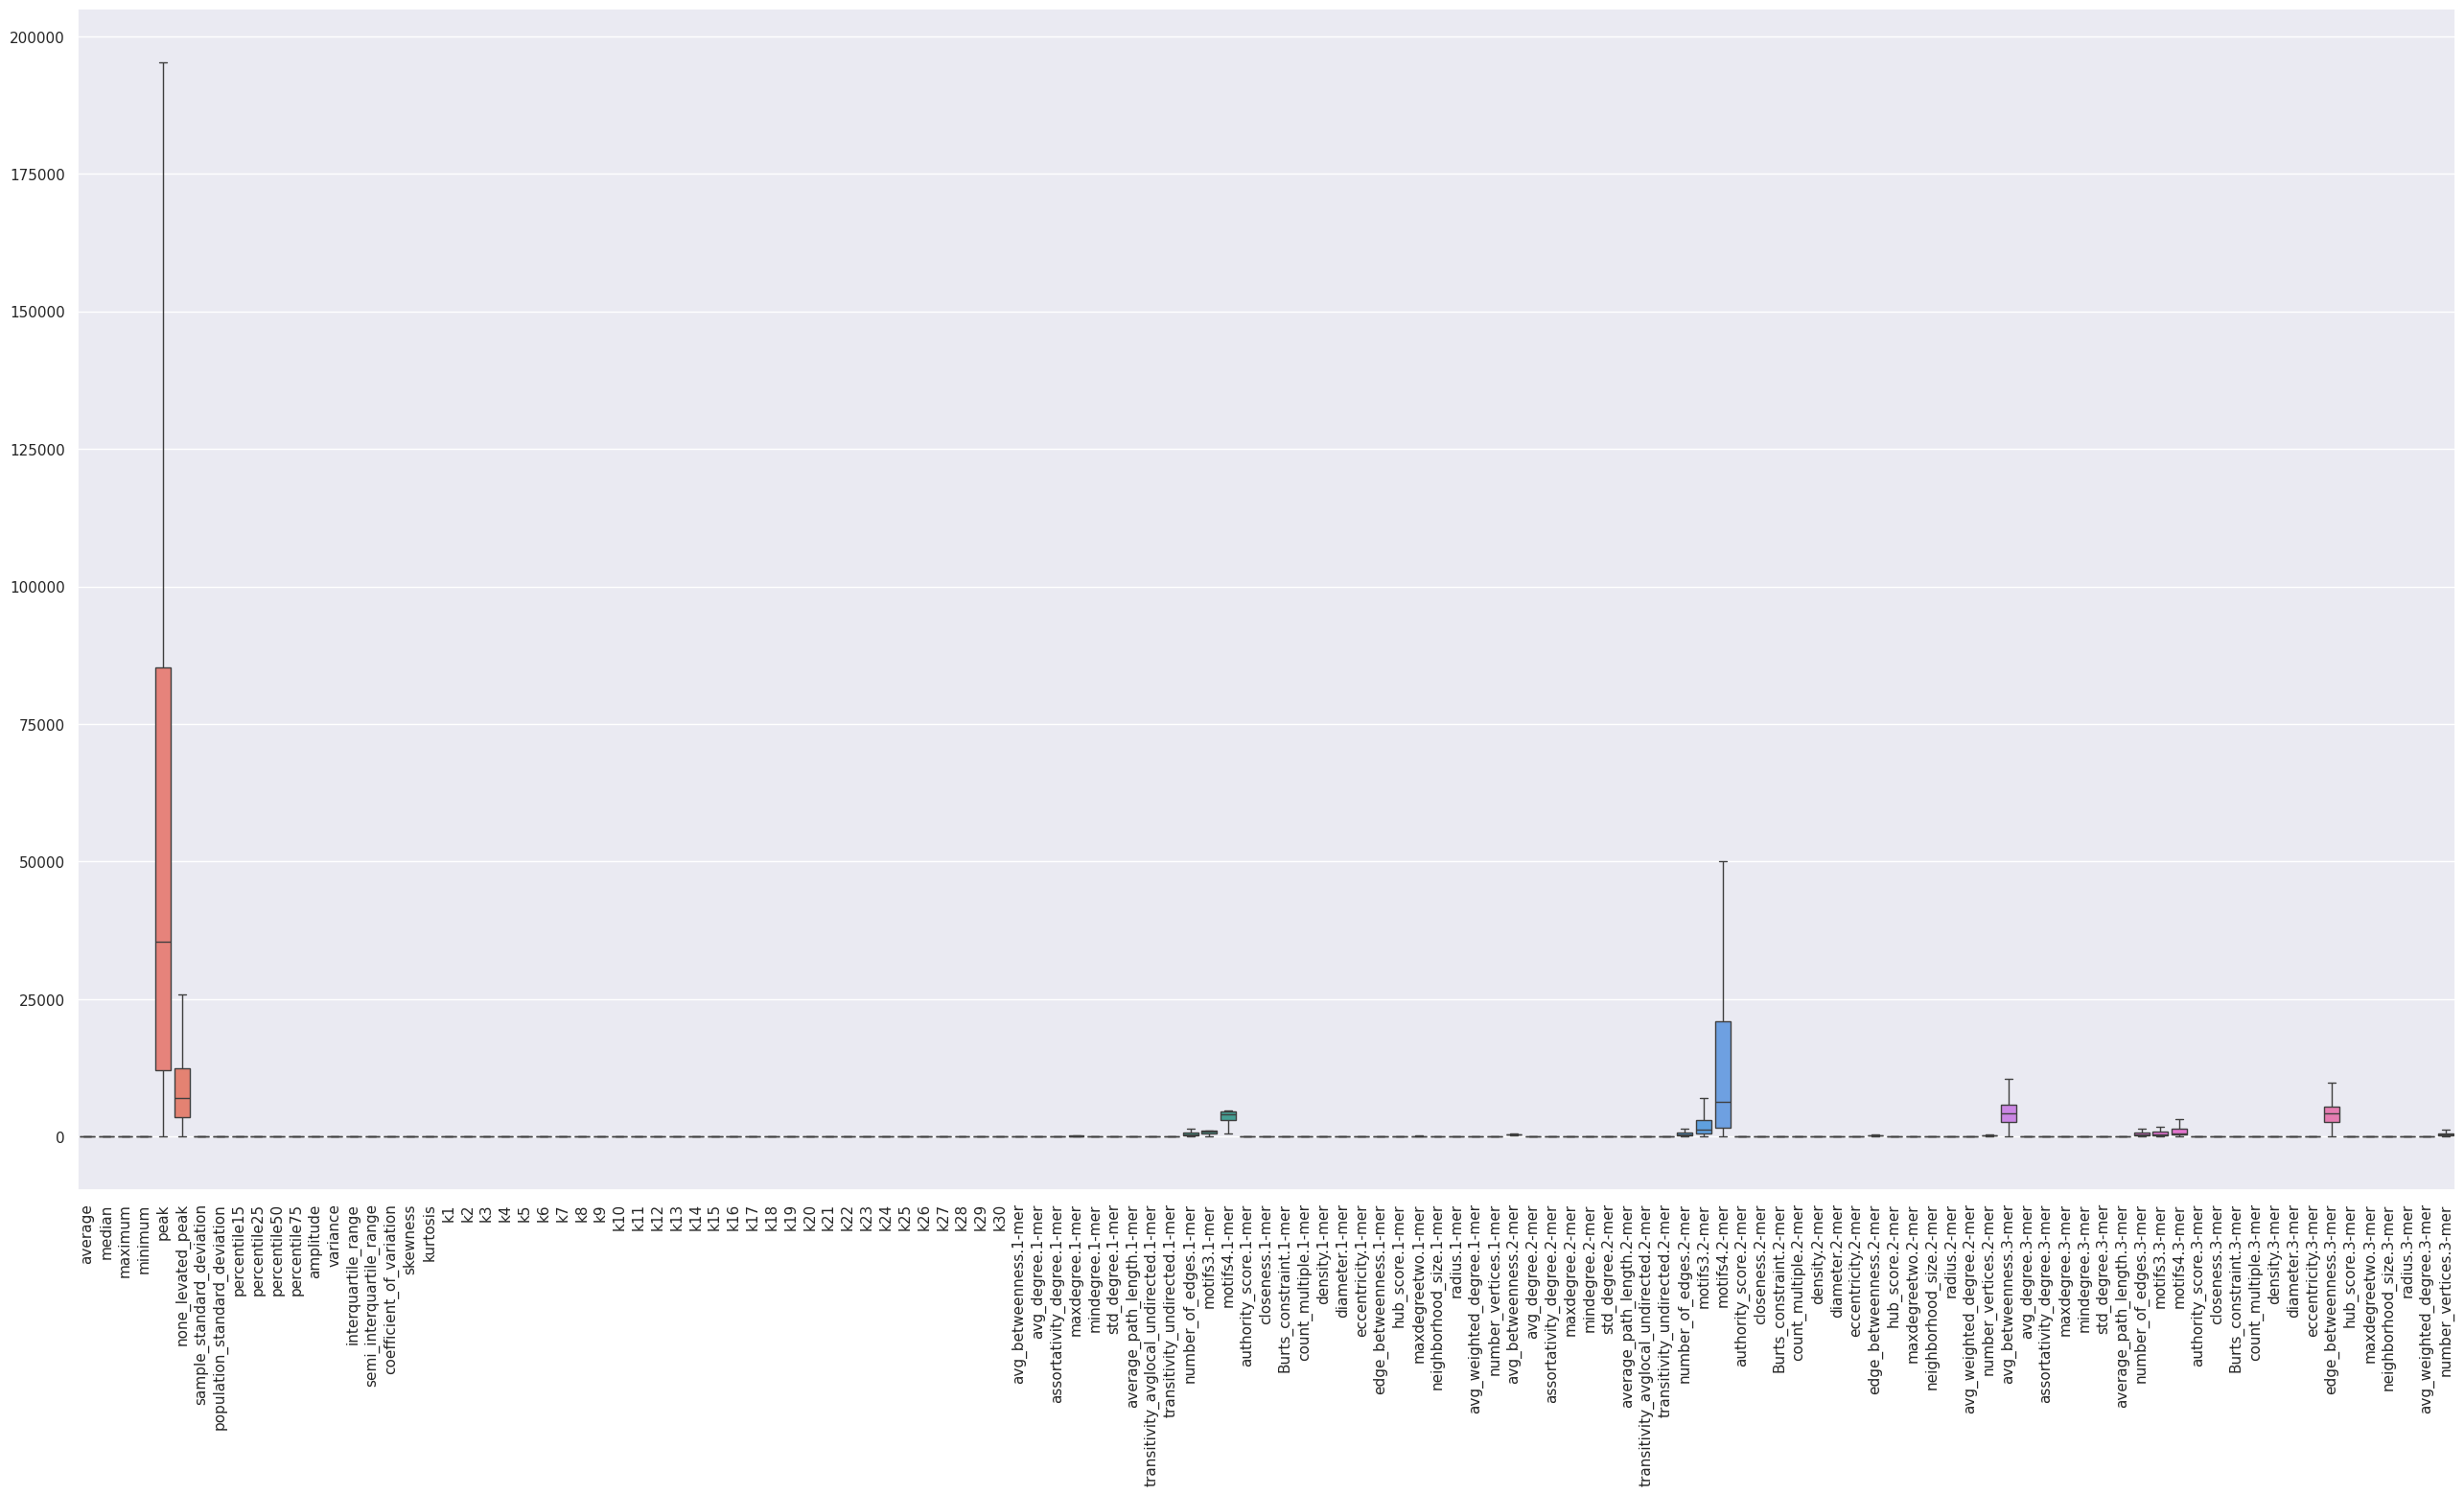

In [8]:
# Remover outlayers con método de boxplot IQR
for i in new_df:
    Q1 = new_df[i].quantile(0.25)
    Q3 = new_df[i].quantile(0.75)
    IQR = Q3 - Q1 # calcular IQR
    new_df[i] = np.where(new_df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),new_df[i]) #remover outlayers
    new_df[i] = np.where(new_df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),new_df[i])

plt.figure(figsize=(32,16))
sns.boxplot(data = new_df)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 [Text(0, 0, 'average'),
  Text(1, 0, 'median'),
  Text(2, 0, 'maximum'),
  Text(3, 0, 'minimum'),
  Text(4, 0, 'peak'),
  Text(5, 0, 'none_levated_peak'),
  Text(6, 0, 'sample_standard_deviation'),
  Text(7, 0, 'population_standard_d

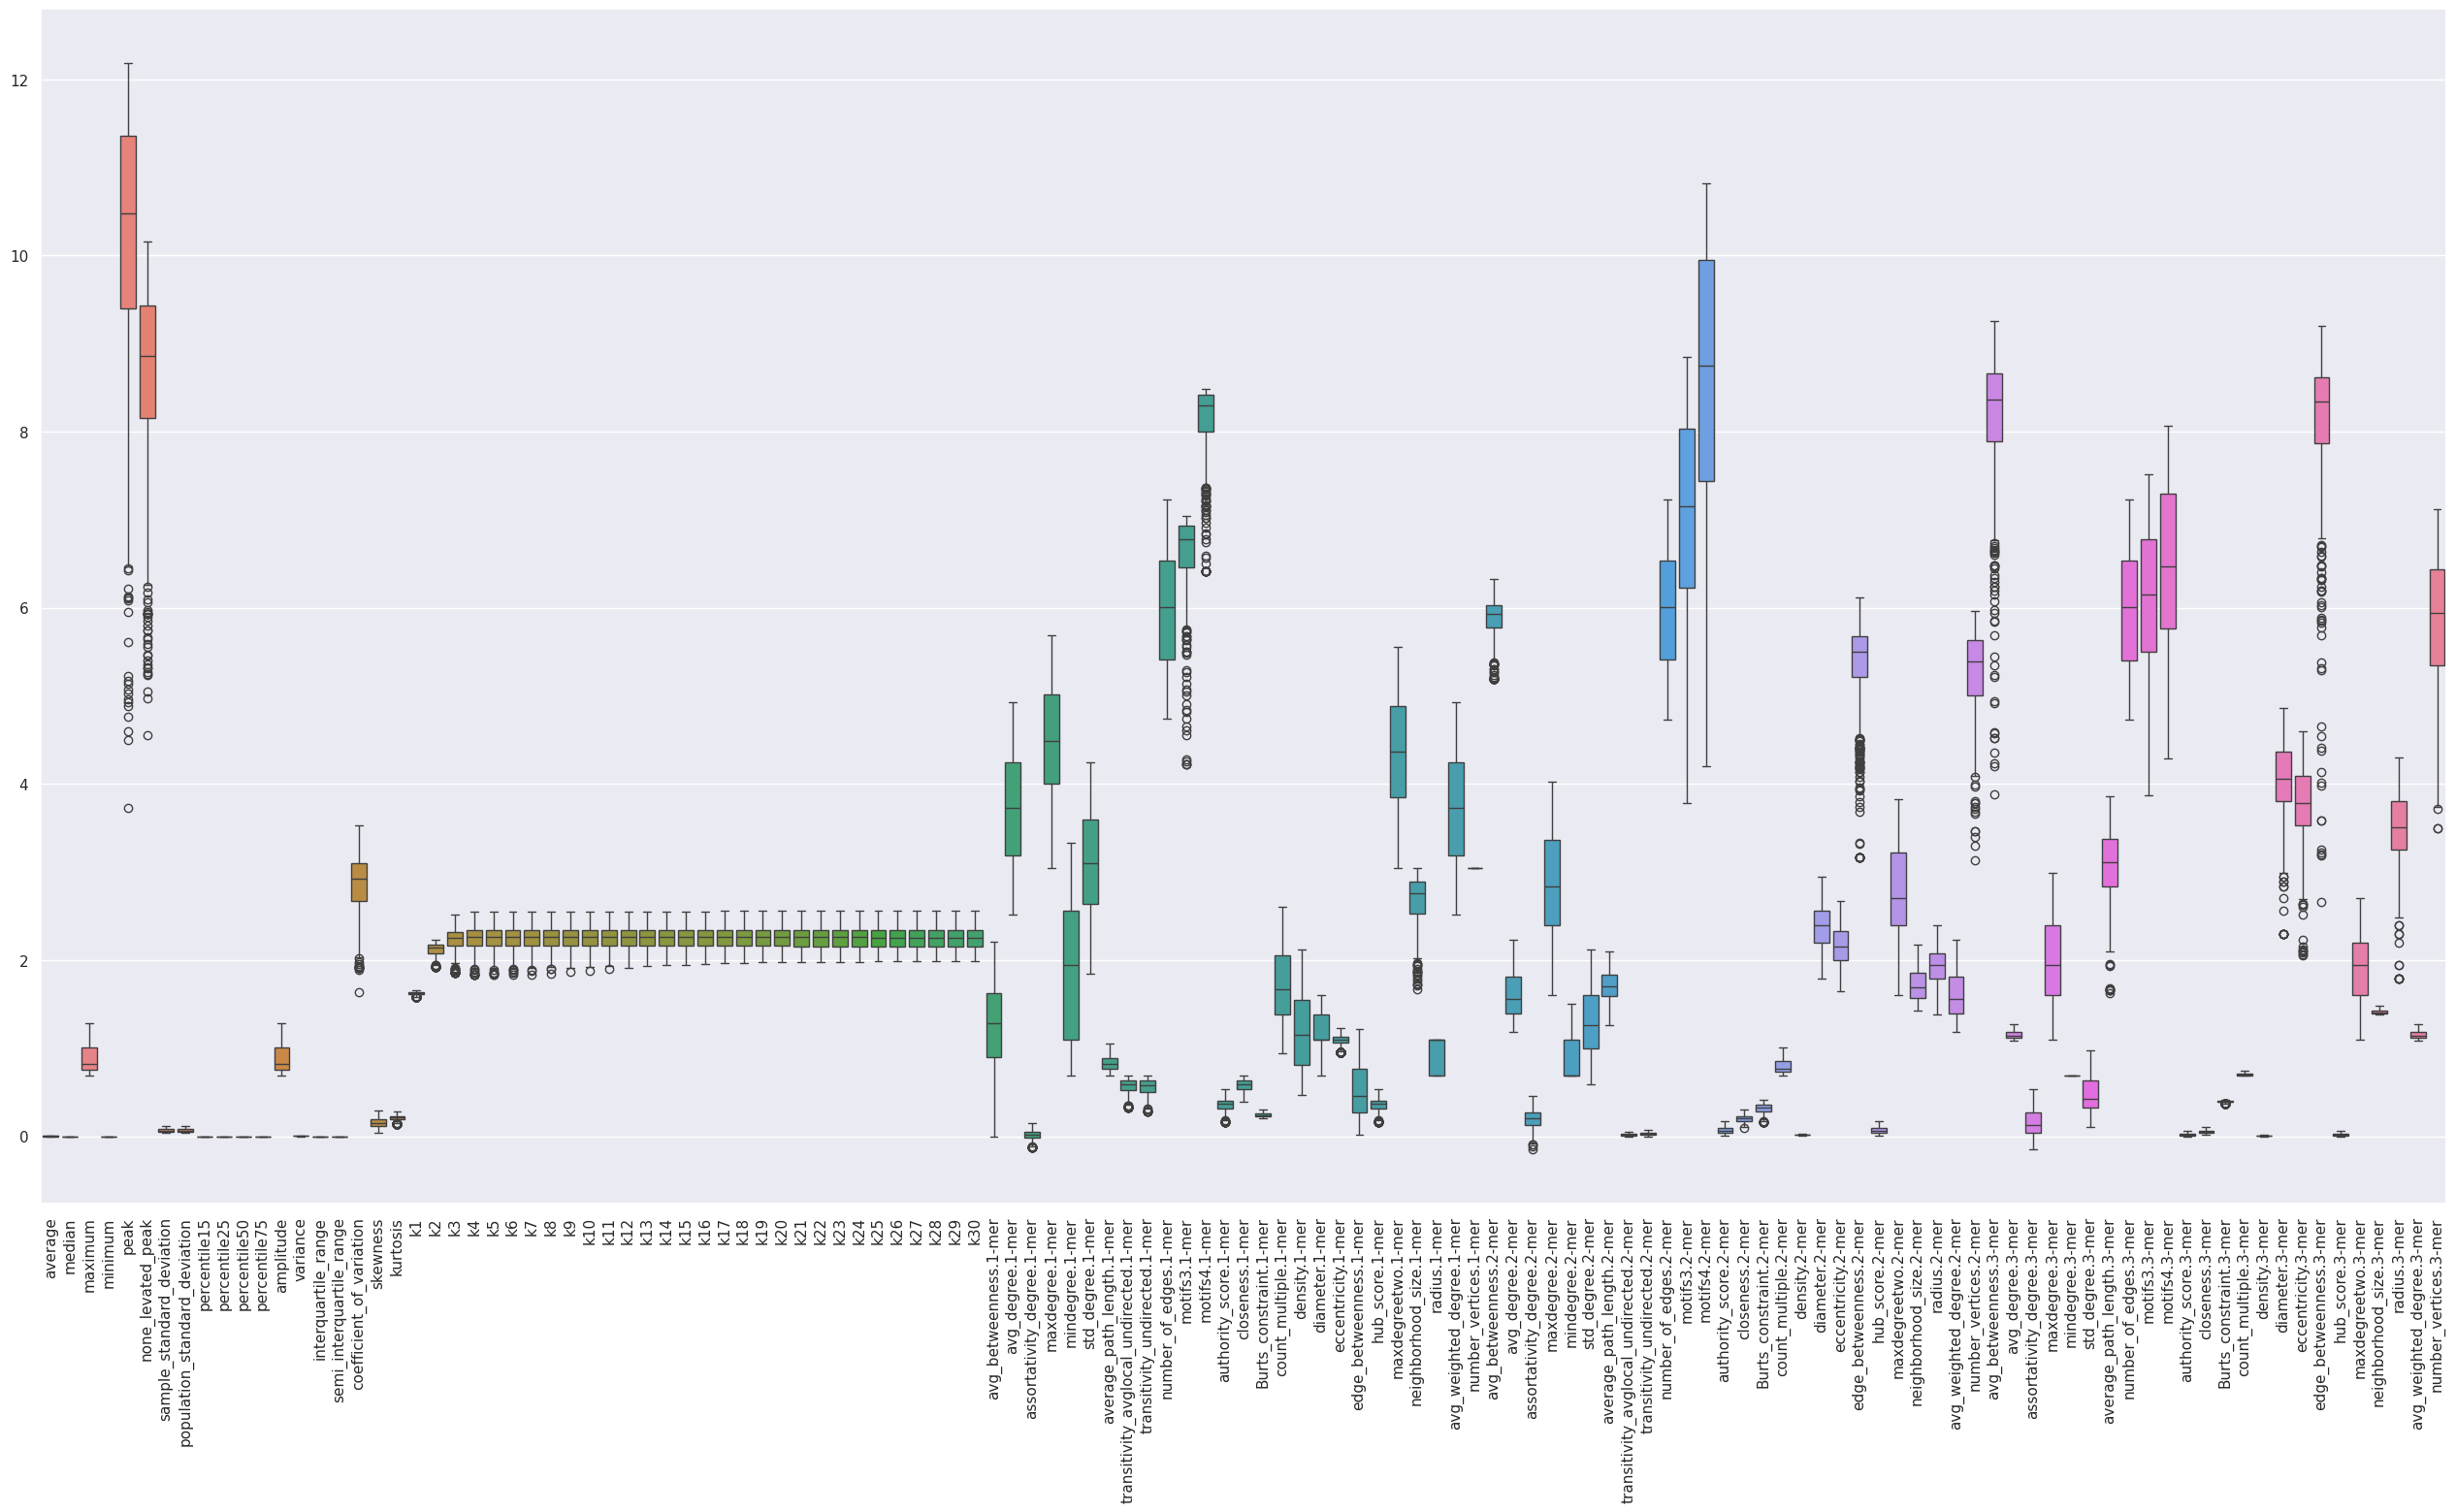

In [9]:
log_df = np.log1p(new_df)
plt.figure(figsize=(32,16))
sns.boxplot(data = log_df)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 [Text(0, 0, 'average'),
  Text(1, 0, 'median'),
  Text(2, 0, 'maximum'),
  Text(3, 0, 'minimum'),
  Text(4, 0, 'peak'),
  Text(5, 0, 'none_levated_peak'),
  Text(6, 0, 'sample_standard_deviation'),
  Text(7, 0, 'population_standard_d

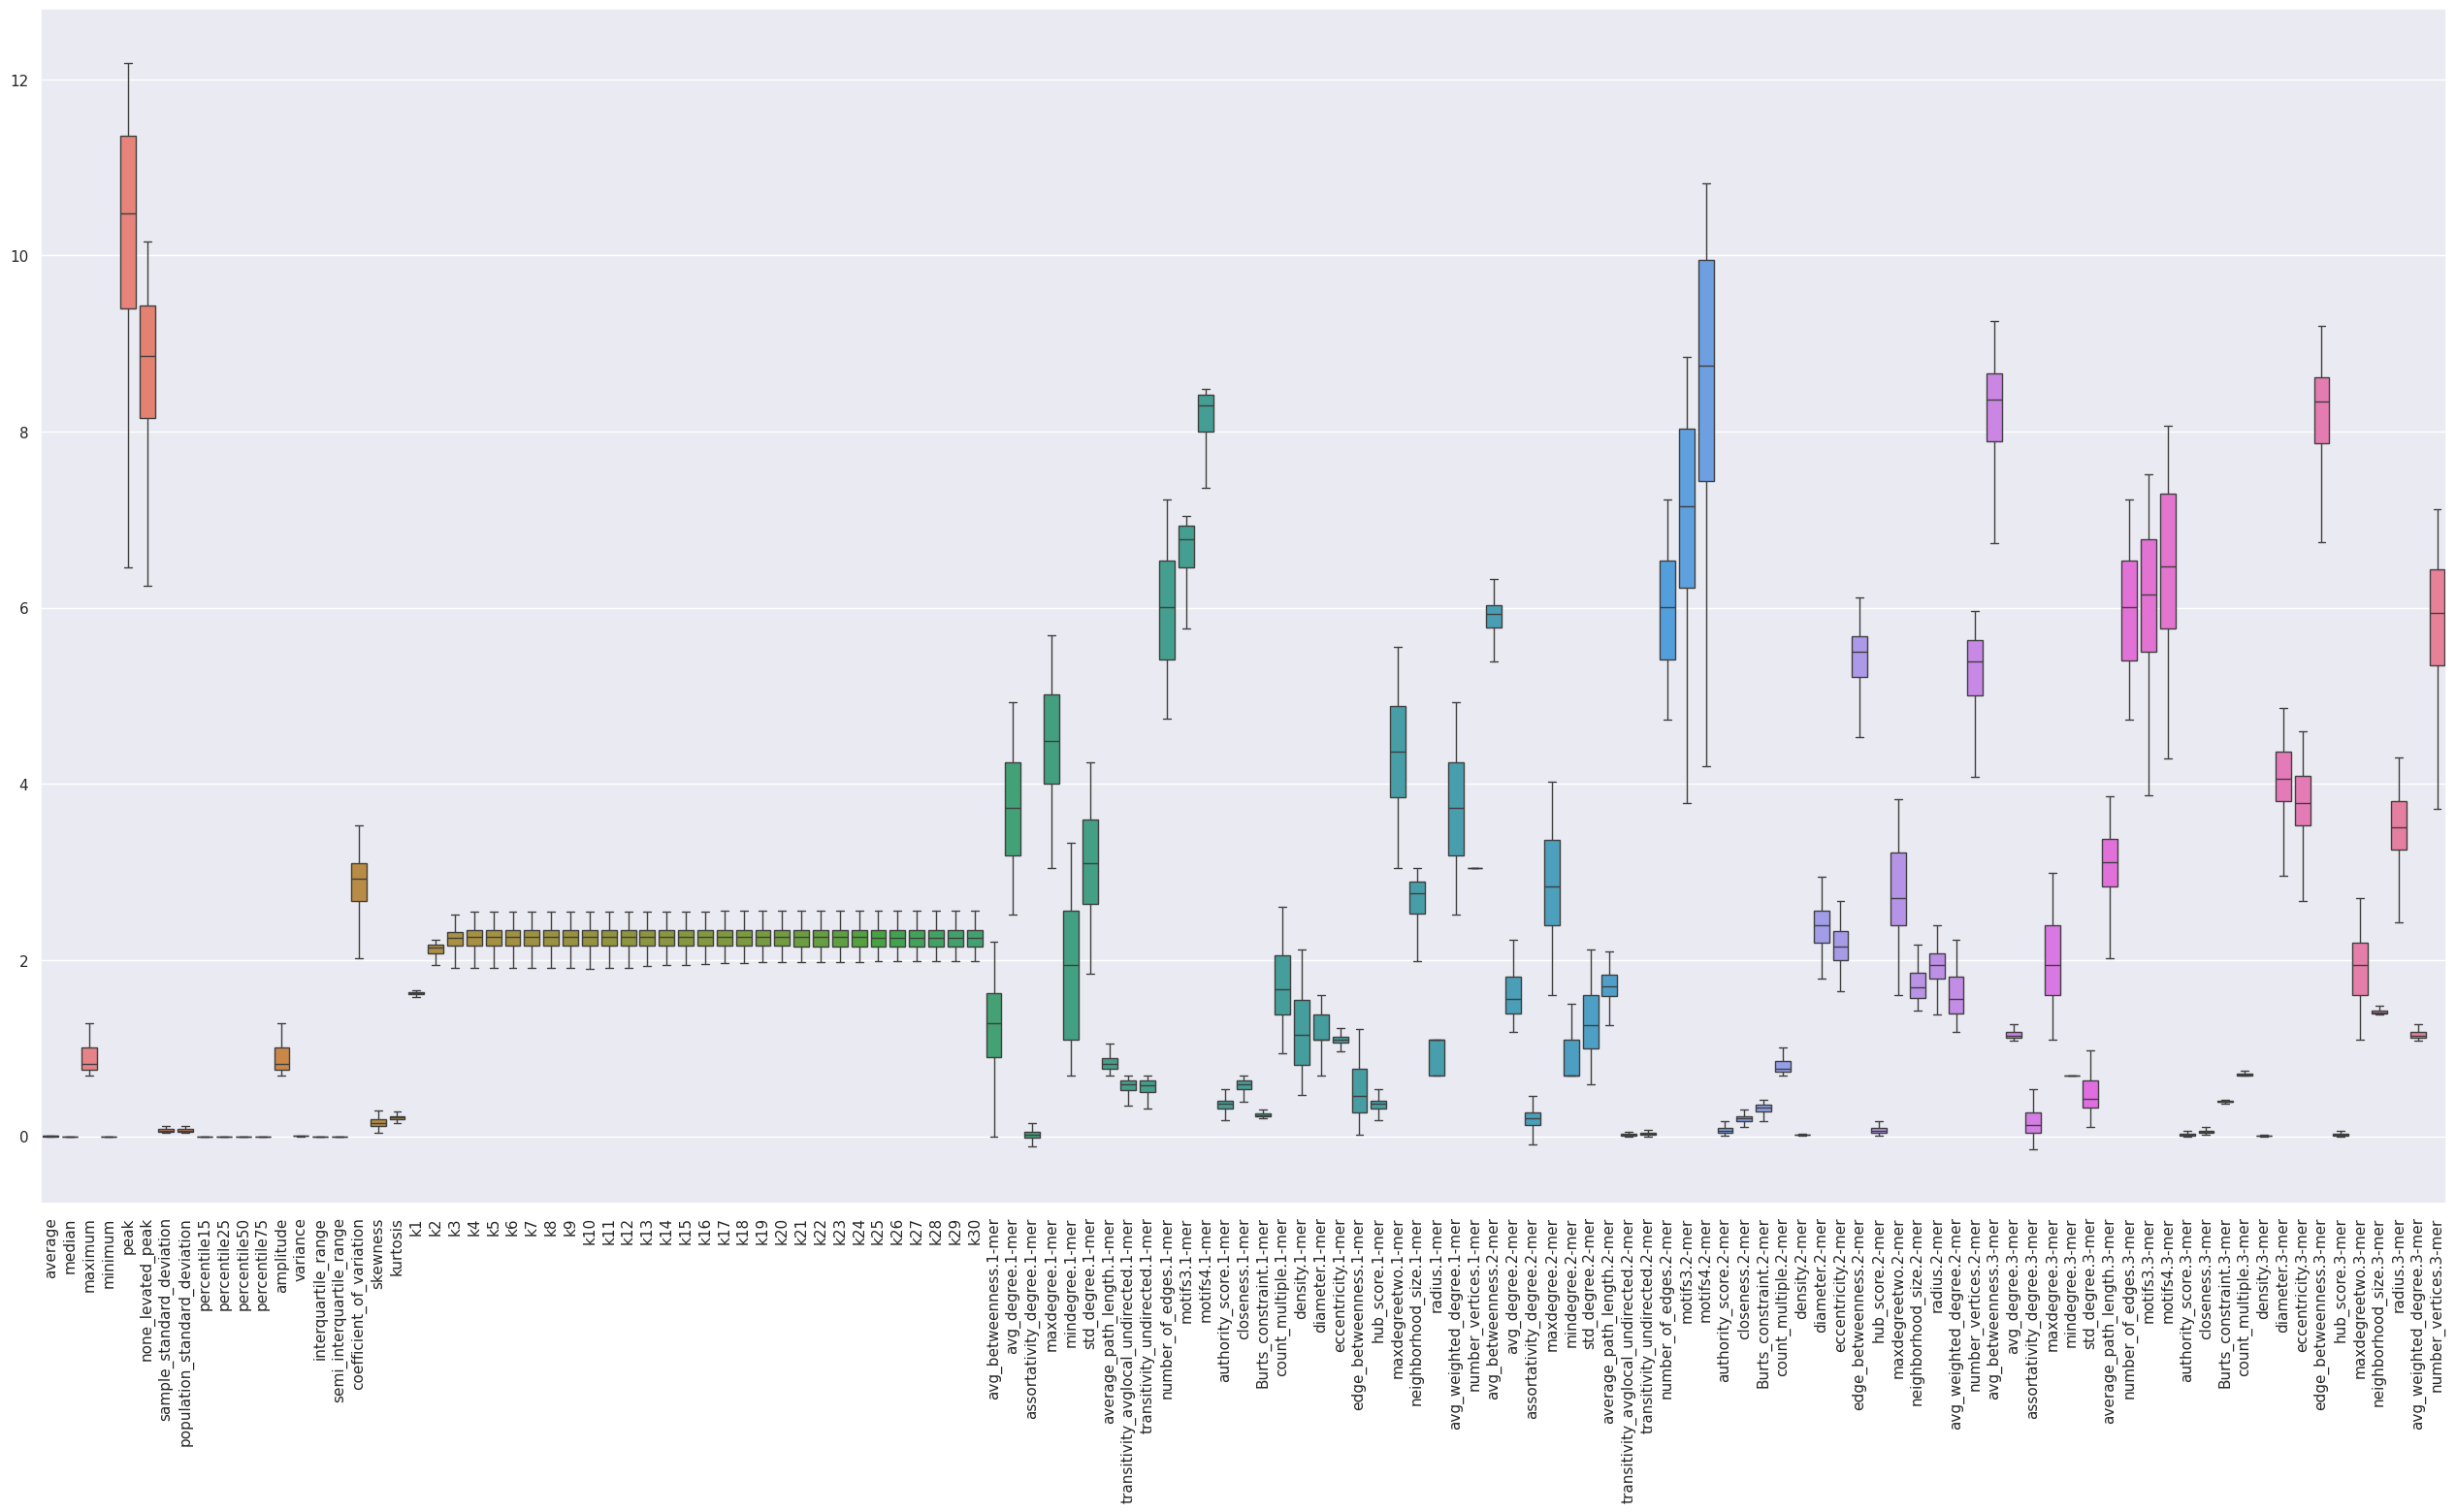

In [10]:
# Remover outlayers con método de boxplot IQR
for i in log_df:
    Q1 = log_df[i].quantile(0.25)
    Q3 = log_df[i].quantile(0.75)
    IQR = Q3 - Q1 # calcular IQR
    log_df[i] = np.where(log_df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),log_df[i]) #remover outlayers
    log_df[i] = np.where(log_df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),log_df[i])

plt.figure(figsize=(32,16))
sns.boxplot(data = log_df)
plt.xticks(rotation=90)

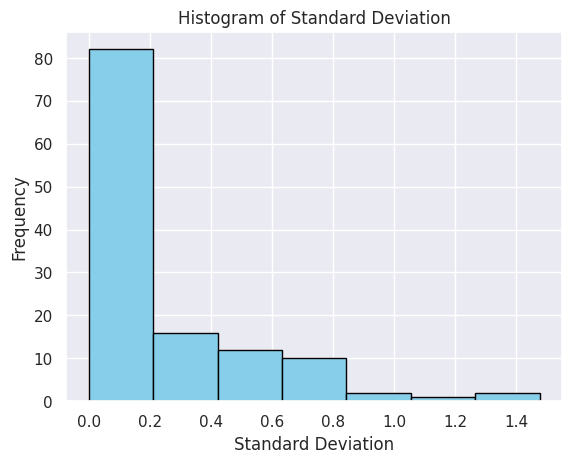

In [11]:
#select the 'std' column
std_column = log_df.describe().T['std']

# Create the histogram
plt.hist(std_column, bins=7, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviation')

# Show the histogram
plt.show()

In [12]:
# Get the names of columns with std >= 0.2
filtered_columns = log_df.describe().T[log_df.describe().T['std'] >= 0.2].index

# Filter the original DataFrame using the column names
log_df = log_df[filtered_columns]

In [13]:
log_df

,peak,none_levated_peak,coefficient_of_variation,avg_betweenness.1-mer,avg_degree.1-mer,maxdegree.1-mer,mindegree.1-mer,std_degree.1-mer,number_of_edges.1-mer,motifs3.1-mer,...,average_path_length.3-mer,number_of_edges.3-mer,motifs3.3-mer,motifs4.3-mer,diameter.3-mer,eccentricity.3-mer,edge_betweenness.3-mer,maxdegreetwo.3-mer,radius.3-mer,number_vertices.3-mer
nameseq,,,,,,,,,,,,,,,,,,,,,
TRINITY_DN10013_c0_g1_i16.p1,12.181935,9.957989,3.328080,0.470004,4.738827,5.631212,3.044522,4.060202,7.033506,7.022868,...,2.770372,7.031741,7.383989,8.004366,3.850148,3.490944,8.784302,2.564949,3.178054,6.902743
TRINITY_DN1003_c1_g1_i5.p1,10.923083,9.362526,3.045269,1.081805,3.824284,4.369448,2.397895,2.998174,6.107023,6.879356,...,3.432567,6.102559,6.214608,6.418365,4.204693,3.996968,8.740957,1.609438,3.688879,6.070738
TRINITY_DN10080_c0_g1_i29.p1,10.335603,8.613331,2.886601,1.280934,3.663562,4.574711,2.397895,3.125209,5.942799,6.794587,...,3.013539,5.937536,6.131226,6.484635,3.931826,3.716625,8.054170,1.609438,3.465736,5.863631
TRINITY_DN10139_c0_g1_i2.p1,9.705133,8.438351,2.756962,1.446919,3.214868,3.970292,1.609438,2.525868,5.480639,6.690842,...,3.277967,5.472271,5.564520,5.730100,4.219508,3.956040,7.967827,1.609438,3.761200,5.451038
TRINITY_DN10150_c1_g1_i22.p1,10.696887,8.890406,2.974280,1.147402,3.850148,4.770685,1.945910,3.358787,6.133398,6.869014,...,3.070813,6.129050,6.371612,6.836259,4.343805,4.051580,8.300657,1.945910,3.663562,6.052089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN9848_c6_g1_i2.p1,10.936177,9.338050,3.048417,1.115142,3.835142,4.553877,2.197225,3.099423,6.118097,6.870053,...,3.391216,6.113682,6.232448,6.447306,4.382027,4.147530,8.705507,1.609438,3.713572,6.079933
TRINITY_DN9856_c0_g1_i51.p1,11.475447,9.588090,3.185105,1.064711,4.209160,5.164786,2.564949,3.652787,6.498282,6.895683,...,2.930663,6.495266,6.767343,7.218177,3.784190,3.526554,8.504536,1.945910,3.258097,6.410175
TRINITY_DN9856_c0_g1_i88.p1,11.475447,9.588090,3.185105,1.064711,4.209160,5.164786,2.564949,3.652787,6.498282,6.895683,...,2.930663,6.495266,6.767343,7.218177,3.784190,3.526554,8.504536,1.945910,3.258097,6.410175


In [14]:
correlation_matrix = log_df.corr()

In [15]:
# Establecer un umbral
threshold = 0.9

# Encontrar las pares de variables cuya correlación absoluta exceda el umbral
highly_correlated = np.where(np.abs(correlation_matrix) > threshold)
highly_correlated = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                     for x, y in zip(*highly_correlated) if x != y and x < y]


In [16]:
# Sumar las correlaciones absolutas para cada variable
correlation_sum = correlation_matrix.abs().sum(axis=1)

# Crear un conjunto de variables a eliminar
variables_to_drop = set()
for var1, var2 in highly_correlated:
    if correlation_sum[var1] > correlation_sum[var2]:
        variables_to_drop.add(var1)
    else:
        variables_to_drop.add(var2)

# Eliminar las variables seleccionadas
log_df = log_df.drop(columns=variables_to_drop)

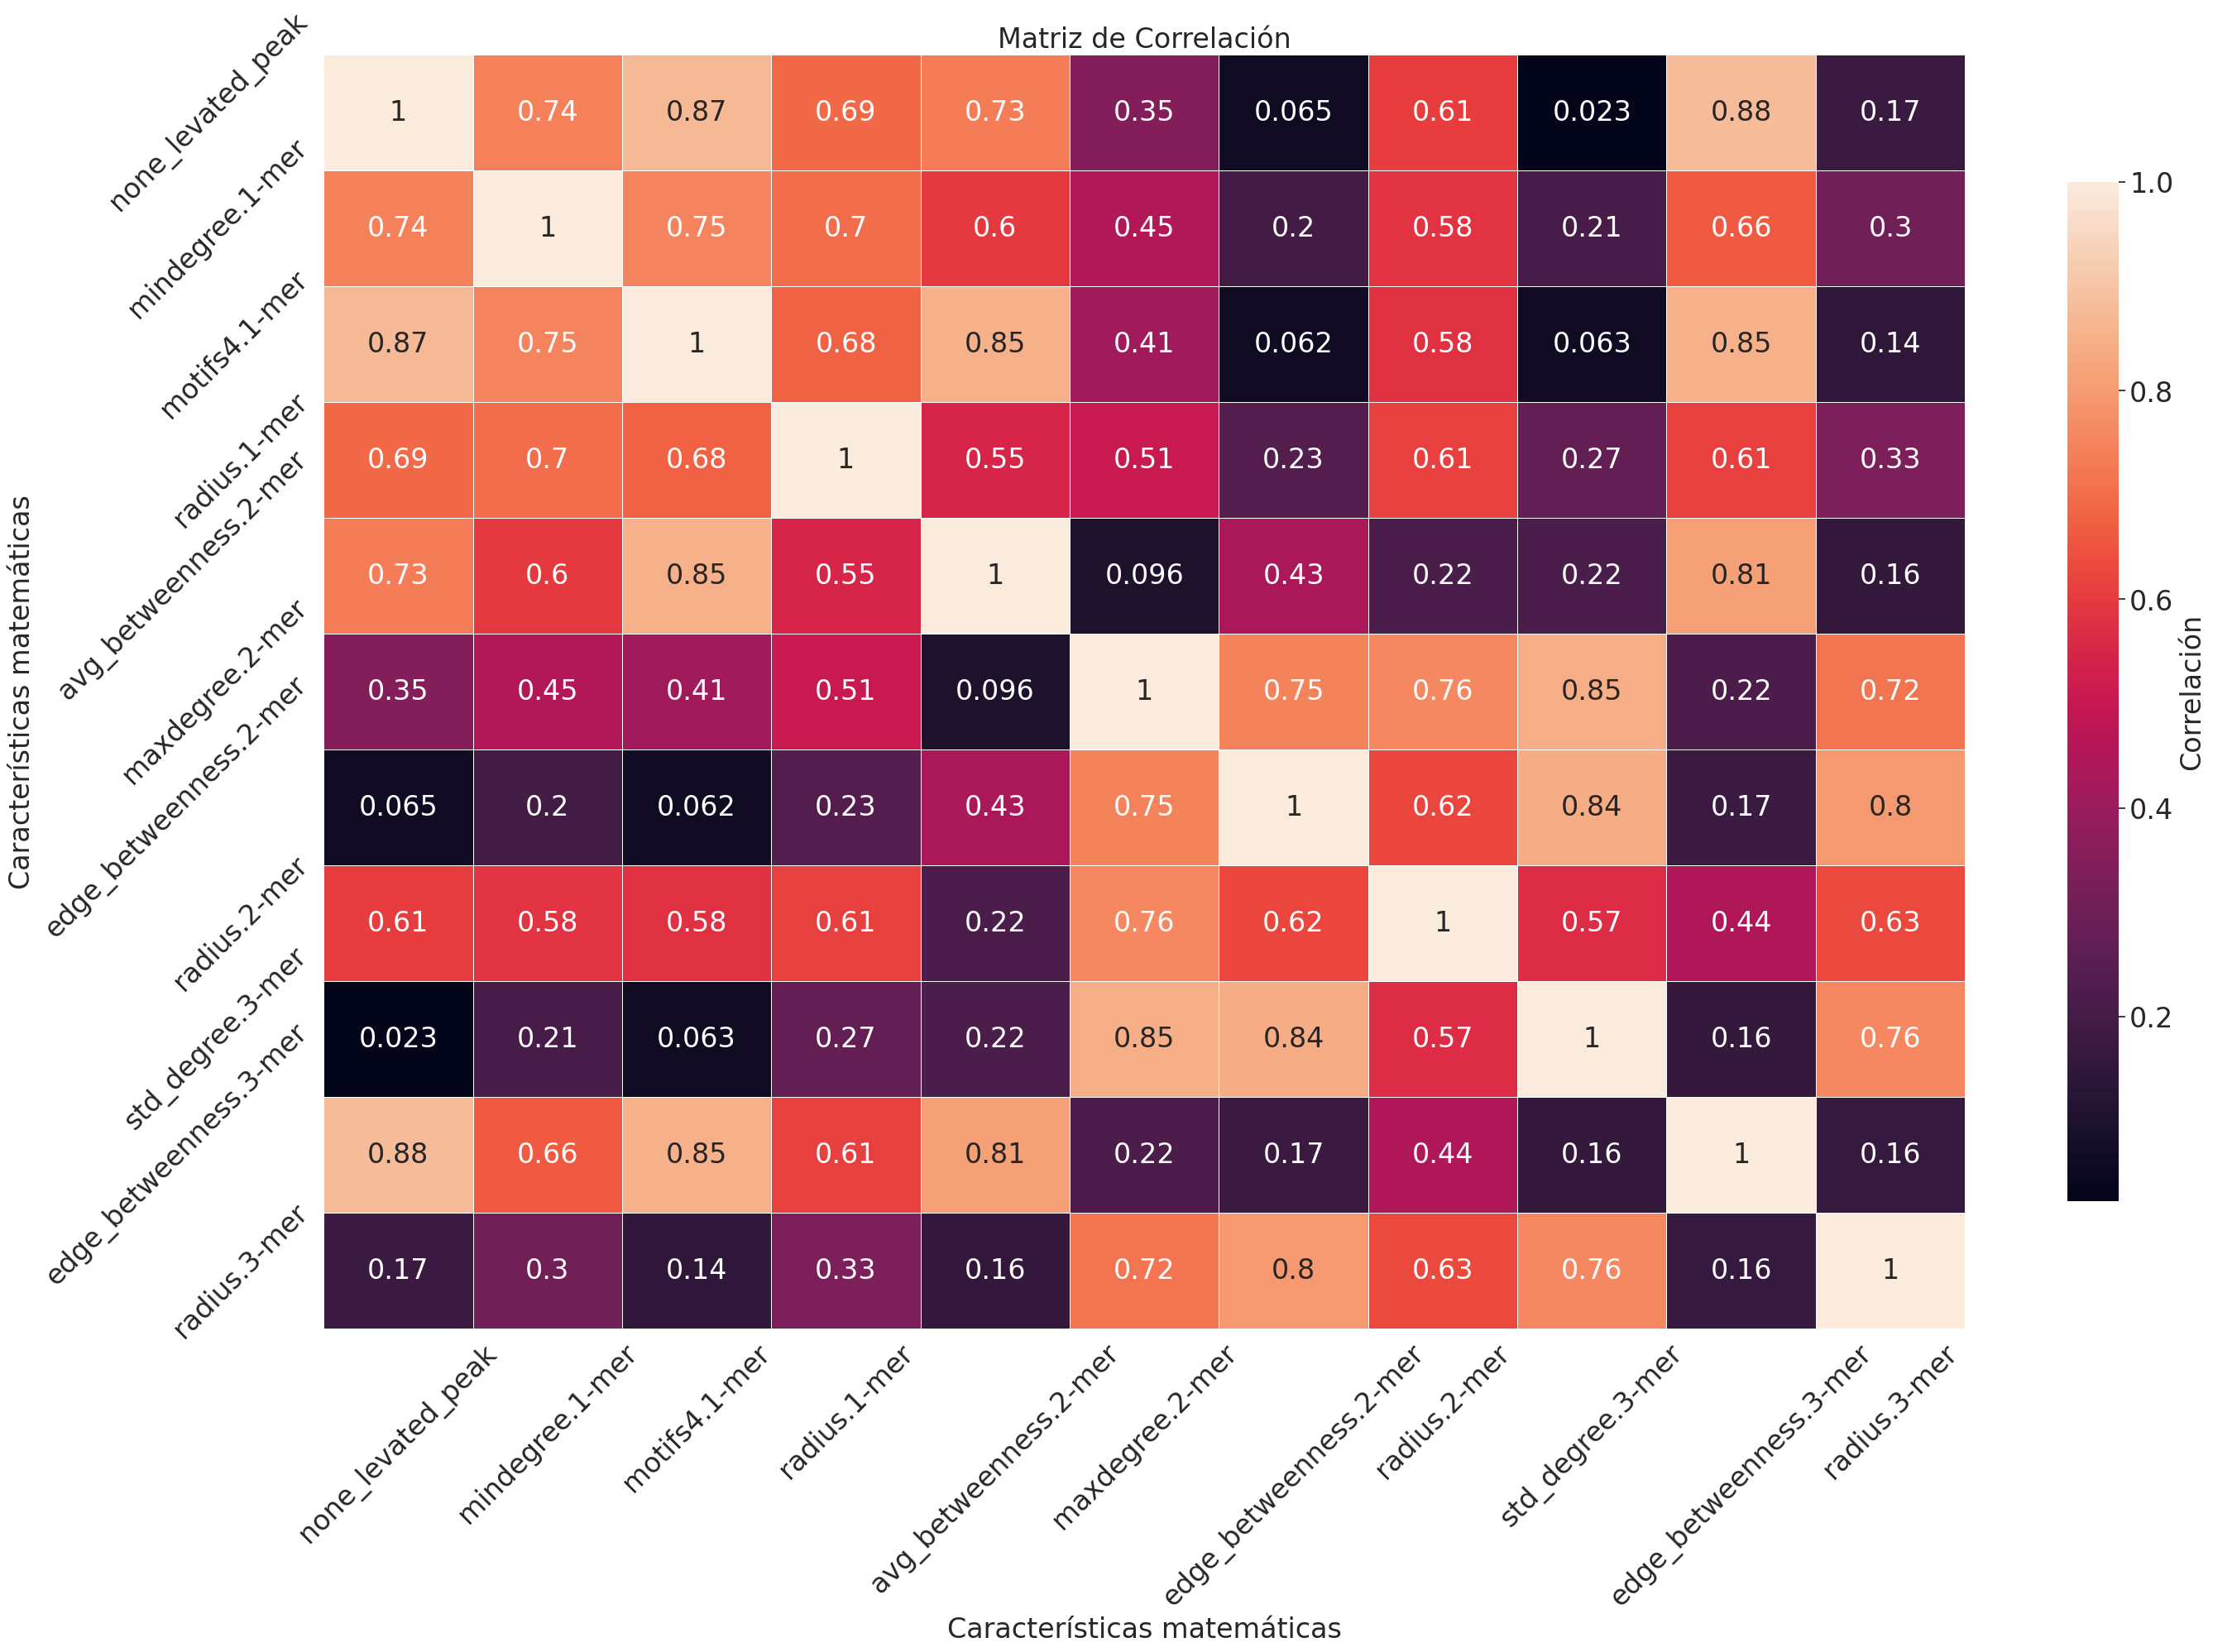

In [23]:
# Crear matriz de correlación
corr = abs(log_df.corr())

# Ajustar el tamaño de la figura
plt.figure(figsize=(32, 20))

# Crear el heatmap con anotaciones y barra de color con texto personalizado
ax = sns.heatmap(corr, linewidths=.5, annot=True, annot_kws={"size": 24},
                 cbar_kws={'label': 'Correlación', 'shrink': 0.8})

# Aumentar el tamaño de la etiqueta de la barra de color
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=24)  # Cambiar el tamaño de los ticks de la barra de color
cbar.set_label('Correlación', fontsize=24)  # Cambiar el tamaño de la etiqueta de la barra de color


# Rotar las etiquetas de los ejes x e y
plt.yticks(rotation=45, fontsize=24)
plt.xticks(rotation=45, fontsize=24)

# Título y etiquetas de ejes (opcional)
plt.title("Matriz de Correlación", fontsize=24)
plt.xlabel("Características matemáticas", fontsize=24)
plt.ylabel("Características matemáticas", fontsize=24)

# Guardar el gráfico en formato PNG con compresión sin pérdida
plt.savefig("corr_plot.png", format='png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


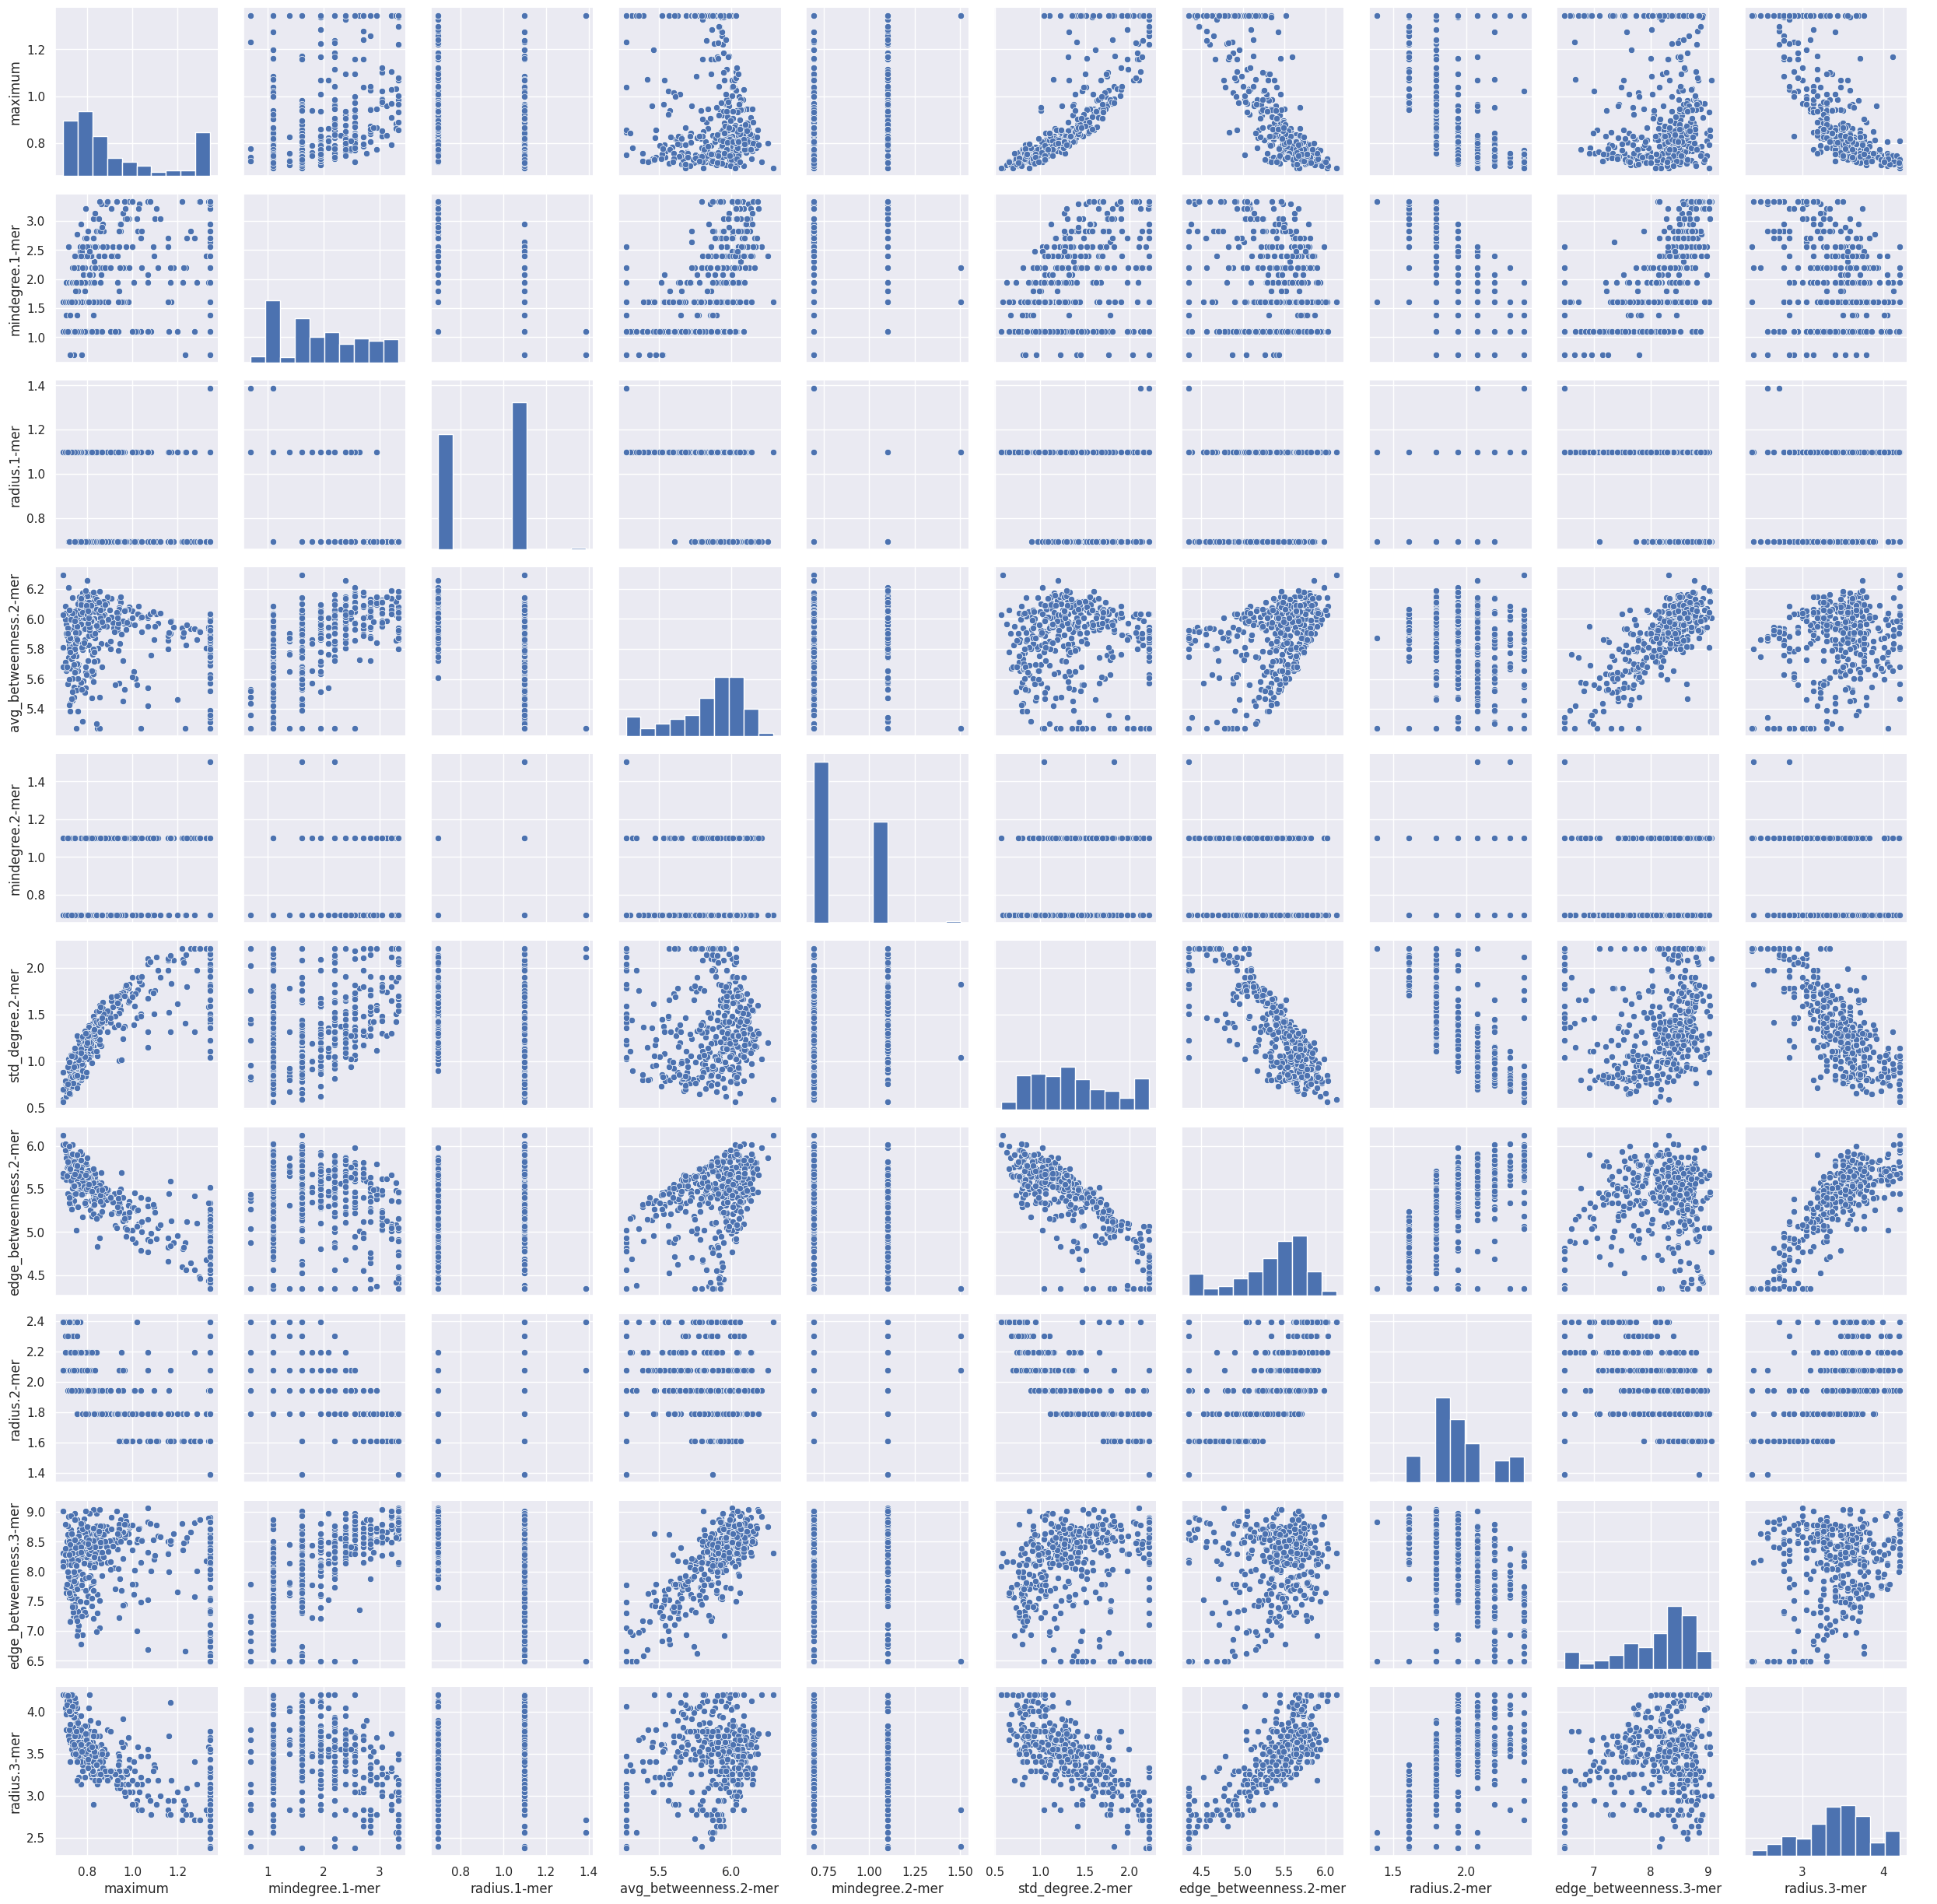

In [ ]:
# Crear el PairGrid
g = sns.PairGrid(log_df, palette="husl")

# Mapear scatter plot en los gráficos fuera de la diagonal principal, configurando el color según 'rna_type'
g = g.map_offdiag(sns.scatterplot, palette="husl")

# Mapear histograma en la diagonal principal
g = g.map_diag(plt.hist)

# Añadir leyenda
g = g.add_legend()

# Guardar el gráfico en formato PNG con compresión sin pérdida
plt.savefig("pairplot.png", format='png', dpi=300, bbox_inches='tight')

# Mostrar el PairGrid
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Data z normalization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(log_df.drop(['mindegree.1-mer', 'radius.1-mer', 'mindegree.1-mer', 'radius.2-mer'], axis = 1))

Optimal number of components to explain 95% variance: 4
Explained variance ratio of the selected principal components: 0.97
Optimal number of clusters: 4


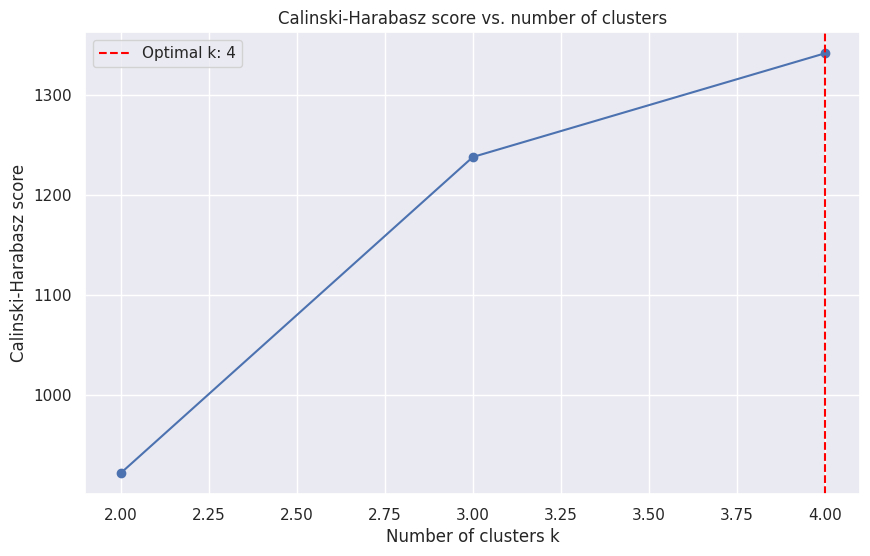

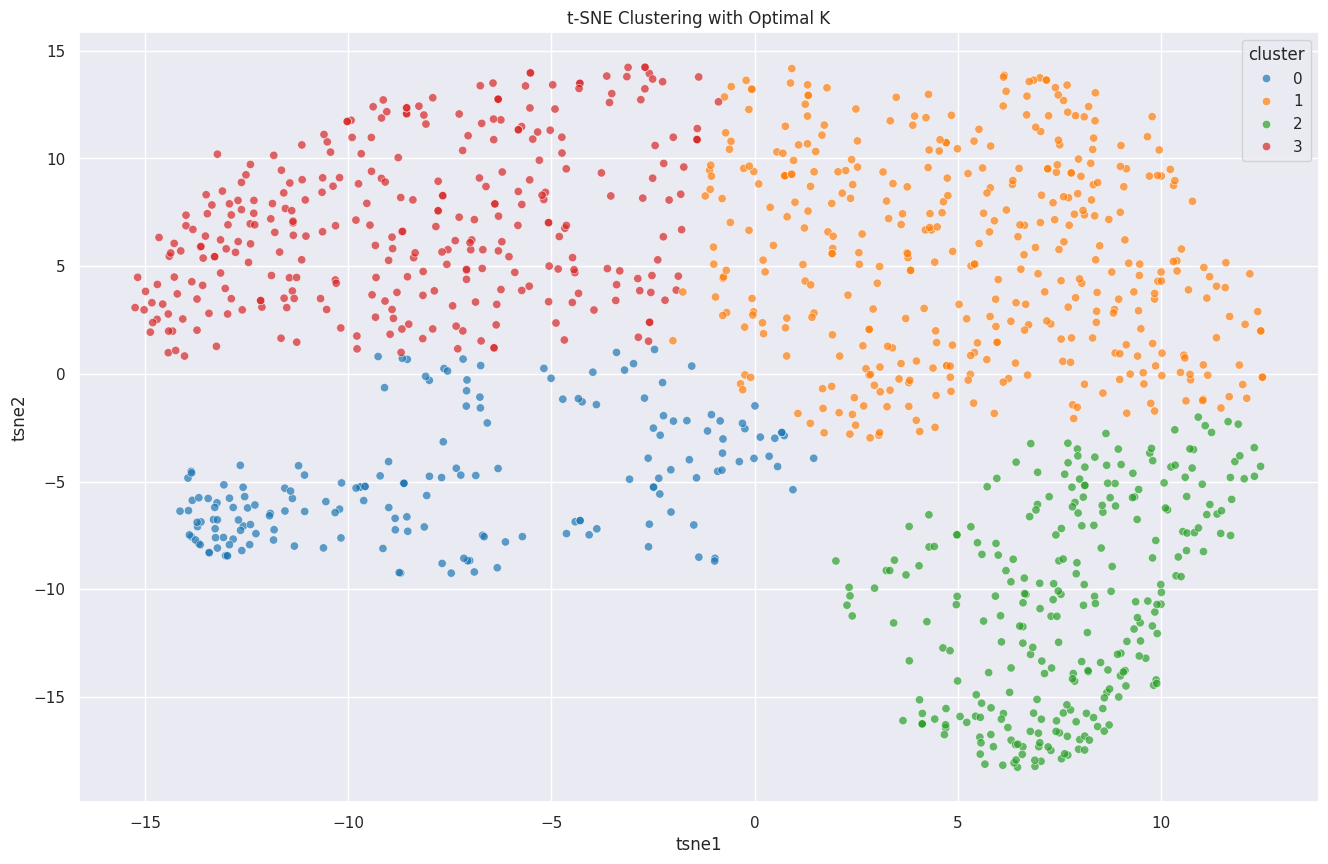

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of principal components to explain the desired variance (e.g., 95%)
pca = PCA().fit(scaled_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Optimal number of components to explain 95% variance: {optimal_components}")

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
pca_result = pca.fit_transform(scaled_df)
print(f"Explained variance ratio of the selected principal components: {np.sum(pca.explained_variance_ratio_):.2f}")

# Apply t-SNE with the chosen perplexity
tsne = TSNE(n_components=2, perplexity = 100, n_iter=3000, random_state=22)
tsne_result = tsne.fit_transform(pca_result)

# Create a DataFrame for the t-SNE result and include the original index
df_tsne = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])
df_tsne['index'] = log_df.index

# Test different values of k for clustering
max_k = 4  # You can adjust this value if you expect more clusters
scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=22)
    cluster_labels = kmeans.fit_predict(tsne_result)
    score = calinski_harabasz_score(tsne_result, cluster_labels)
    scores.append(score)

# Find the optimal number of clusters with the highest score
optimal_k = k_values[np.argmax(scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Plot Calinski-Harabasz scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.xlabel('Number of clusters k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz score vs. number of clusters')
plt.legend()
plt.show()

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=22)
cluster_labels = kmeans.fit_predict(tsne_result)

# Add cluster labels to the t-SNE result dataframe
df_tsne['cluster'] = cluster_labels

# Visualize the clustered data
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette="tab10",
    data=df_tsne,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Clustering with Optimal K')
plt.savefig('clus.png', dpi = 300)
plt.show()

# Set the index of df_tsne to the original index
df_tsne.set_index('index', inplace=True)


In [ ]:
df_tsne.to_csv('all_peps_mathfeatures_clusters.tsv', sep='\t', index=True)

In [ ]:
df_tsne

,tsne1,tsne2,cluster
index,,,
TRINITY_DN10000_c3_g1_i3.p1,-1.417890,-0.852514,0
TRINITY_DN10029_c6_g1_i1.p1,-3.583008,-0.386982,4
TRINITY_DN10083_c0_g1_i5.p1,-1.331816,-2.322015,0
TRINITY_DN10140_c0_g1_i4.p1,5.531293,0.820170,5
TRINITY_DN10169_c0_g1_i10.p2,-0.961629,6.506793,1
...,...,...,...
TRINITY_DN9736_c0_g1_i13.p1,3.134218,7.094743,2
TRINITY_DN9769_c0_g1_i2.p1,-6.614485,-3.386839,3
TRINITY_DN9769_c0_g1_i5.p1,-2.148171,0.823279,4
